# Análisis Exploratorio de Datos (EDA) de Spotify 


<div style="text-align: center;">
    <img src="./logo-vector-spotify.jpg" alt="logo" />
</div>


## 1. Introducción

En este proyecto realizaremos un análisis exploratorio de datos utilizando Python, utilizando información de la biblioteca de datos Kaggel sobre Spotify, que incluye información sobre canciones,artistas y características de las canciones.

## 2. Objetivo

Estudiar el comportamiento de la popularidad y el impacto del resto de variables para identificar conclusiones relevantes y significativas a través del análisis estadístico.

## 3. Hipótesis

1. Cuáles son los géneros musicales más populares?
2. ¿Las características musicales de una canción como la acústica, bailabilidad, tempo, etc, influyen significativamente en la popularidad?
3. ¿Qué característica músical impacta más en la popularidad?
4. ¿Qué relación tiene la duración de una canción con la popularidad?
5. ¿Las canciones más populares tiene un estado de ánimo positivo(balance cercano a 1?)
6. ¿Las canciones más populares tiene alta bailabilidad?
7. ¿Las canciones acústicas son populares?
8. ¿Las canciones en vivo son populares?
9. ¿Qué factores explican la popularidad de las canciones?

## 4. Importación de librerías

Usamos las siguientes librerías:

In [107]:
#Liberías para gestionar datos
import pandas as pd
import numpy as np
#Liberías gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#Liberías estadísticas inferencialesç
from scipy import stats
from scipy.stats import probplot,f_oneway,pearsonr, spearmanr,ttest_ind,linregress
from scipy.stats import normaltest
from scipy.stats import shapiro,kruskal,levene
from scipy.stats import spearmanr
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis, skew,shapiro

import warnings
warnings.filterwarnings('ignore')

In [108]:
# Elección de estilos gráficos:
# plt.style.available

# Pueden elegir uno de ellos y ejecutarlo de esta forma:
# plt.style.use("ggplot")

## 5. Importación de dataset

In [109]:
df_features = pd.read_csv('bbdd.csv')

### 5.1 Desripción de columnas de dataframe
| Columnas | Descripción |
|----------|----------|
|genre|género de la canción
|artist_name|Nombre del artista
|track_name|Nombre de la canción
|track_id|id de canción
|popularity|Cuanto mayor sea el valor, más popular será la canción, de 0 a 100,ponderada por la cercanía en el tiempo.
|acousticness|Cuanto mayor sea el valor, más acústica será la canción
|danceability|Cuanto mayor sea el valor, más fácil será bailar a esta canción.
|duration_ms|La duración de la canción en milisegundos
|energy|La energía de una canción, cuanto mayor sea el valor, más enérgico
|instrumentalness|Representa la cantidad de vocales en la canción. Más cerca a 1 es más instrumental.
|key|La tonalidad de la pista. Los números enteros se asignan a tonos utilizando la notación estándar Pitch Class. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
|liveness|Detecta la presencia de un público en la grabación. Los valores de en vivo (liveness) más altos representan una probabilidad mayor de que la pista se realizó en vivo.
|loudness|Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. Los valores suelen oscilar entre -60 y 0 db.
|mode|Indica la modalidad (mayor o menor) de una sección, el tipo de escala del que se deriva su contenido melódico. Este campo contendrá un 0 para "menor", un 1 para "mayor" o un -1 para ningún resultado.
|speechiness|Detecta la presencia de palabras habladas en una pista. Cuanto más exclusiva sea la grabación similar a un discurso,más cerca del valor de atributo será 1.0
|tempo|El tempo total estimado de una pista en tiempos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración media del ritmo.
|time_signature|El compás es una convención de notación que especifica cuántos tiempos hay en cada compás. El compás oscila entre 3 y 7, lo que indica compases de "3/4" a "7/4".
|valence|Cuanto mayor sea el valor, más positivo será el estado de ánimo de la canción.

## 6. Análisis de datos

### 6.1 Información general

In [110]:
#Obtenemos información general del dataframe a traves de info() y describe()
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [111]:
#Cuántas filas y columnas tiene nuestro dataframe?
df_features.shape

(232725, 18)

In [112]:
#Vista de primeros datos
df_features.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [113]:
#Análisis estadístico de variables númericas
df_features.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [ ]:
#Análisis estadístico de variables tipo object
df_features.describe(include=object) # type: ignore

,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232725,232725,232724,232725,232725,232725,232725
unique,27,14564,148614,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,0UE0RhnRaEYsiYgXpyLoZc,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


De las 18 columnas, se observa que  tenemos 11 columnas númericas y 7 categóricas. 


In [115]:
#Existen nulos o NaN?
df_features.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Exploramos el nan

In [116]:
df_features[df_features['track_name'].isnull()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


Lo buscamos por el track_id

In [117]:
df_features[df_features['track_id']=='7BGQCe62A58Q5ZgpQFX93t']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


¿Cuántos géneros tenemos?

In [118]:
# Qué generos tenemos?
df_features['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [119]:
#Análisis de la variable género
df_features['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

Vemos que hay 2 géneros similares, vamos a analizar qué diferencias encontramos

In [120]:
df_features[df_features['genre']=='Children’s Music'].head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
77052,Children’s Music,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,84,0.5440,0.515,209274,0.479,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.284
77053,Children’s Music,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,86,0.0116,0.464,239507,0.852,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.233
77054,Children’s Music,H.E.R.,Best Part (feat. Daniel Caesar),4OBZT9EnhYIV17t4pGw7ig,84,0.7950,0.473,209400,0.371,0.000000,E,0.1090,-10.219,Minor,0.0405,75.208,4/4,0.413
77055,Children’s Music,Joji,YEAH RIGHT,1VGzxJnVQND7Cg5H5wGj14,81,0.6190,0.672,174358,0.588,0.241000,C#,0.0992,-9.573,Major,0.1330,169.033,4/4,0.204
77056,Children’s Music,H.E.R.,Could've Been (feat. Bryson Tiller),6lzLjIOyWTyTJvk0jraYee,79,0.6400,0.545,248467,0.330,0.000007,C#,0.2200,-11.719,Minor,0.1640,103.553,4/4,0.399


In [121]:
df_features[df_features['genre']=="Children's Music"].head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
71649,Children's Music,Toddler Tunes,Itsy Bitsy Spider,749a3IktgztaKcRg3zmQvv,47,0.302,0.901,137454,0.526,0.000000,C#,0.0540,-7.296,Minor,0.0362,109.946,4/4,0.706
71650,Children's Music,Spongebob Squarepants,The Best Day Ever,3L3dVggx061Wx5y4d2L0mQ,47,0.202,0.565,182173,0.758,0.000000,B,0.0552,-5.205,Major,0.0294,127.817,4/4,0.605
71651,Children's Music,Blippi,The Excavator Song,3X6fJLY0KvjLQSDHTLwvDn,46,0.528,0.737,175187,0.549,0.000087,A,0.2990,-13.215,Major,0.0382,124.980,4/4,0.840
71652,Children's Music,Pinkfong,Baby Shark Music Box,07enmUOMmpuy7ZVUXHAPIk,44,0.688,0.686,110523,0.121,0.885000,G,0.0793,-20.751,Major,0.1030,148.002,4/4,0.818
71653,Children's Music,Toddler Tunes,"Head, Shoulders, Knees and Toes",4izXmYE9U6clkv5uAyVEN7,47,0.249,0.867,83291,0.729,0.000000,C#,0.0802,-6.616,Major,0.0373,120.129,4/4,0.793


Para evitar confusiones, vamos a diferenciar estos género

In [122]:
df_features['genre'].loc[df_features['genre'] == "Children's Music"] = "Infantil"

In [123]:
#Análisis de la variable género
df_features['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Infantil            5403
A Capella            119
Name: count, dtype: int64

Convirtiendo el campo duration_ms de milisegundos a minutos(en decimales) y lo llamaremos duration_min.

In [124]:
df_features['duration_min'] = df_features['duration_ms'].apply (lambda x : round(x/60000,ndigits=1))
df_features.drop('duration_ms', inplace = True, axis=1)
df_features.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.7
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.3
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.8
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.5
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.4


### 6.2 Análisis gráfico univariante

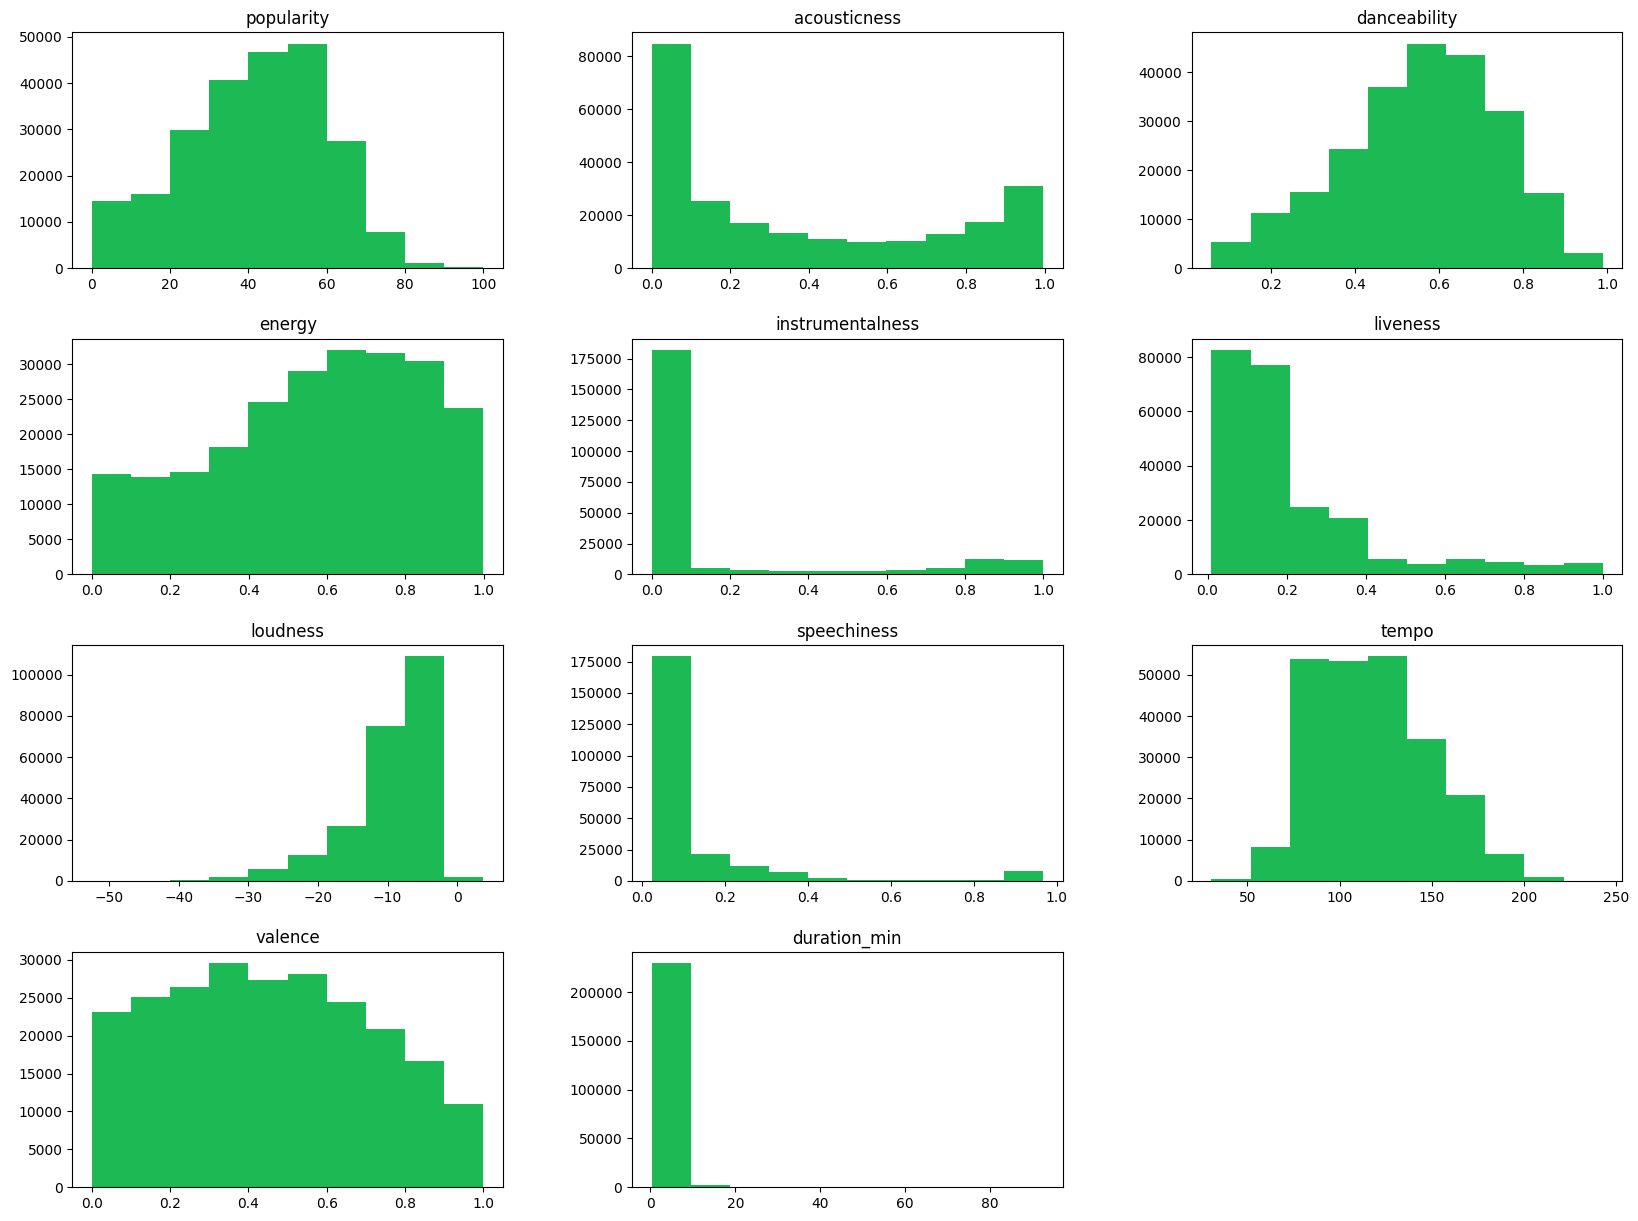

In [125]:
#Análisis gráfico de variables numéricas
verde = "#1DB954"
df_features.hist(figsize=(20,15),grid=False,color=verde,);


Nos centramos en njuestra variable relevante:popularity

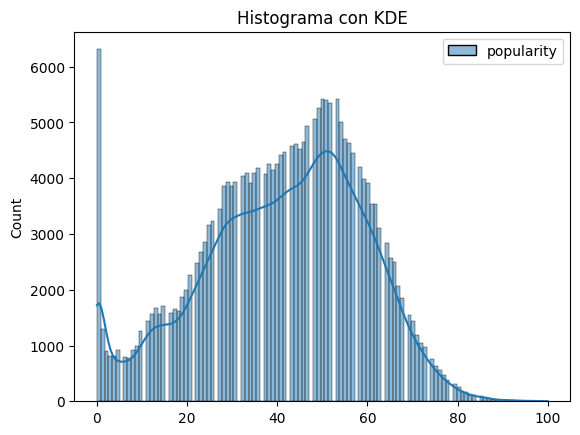

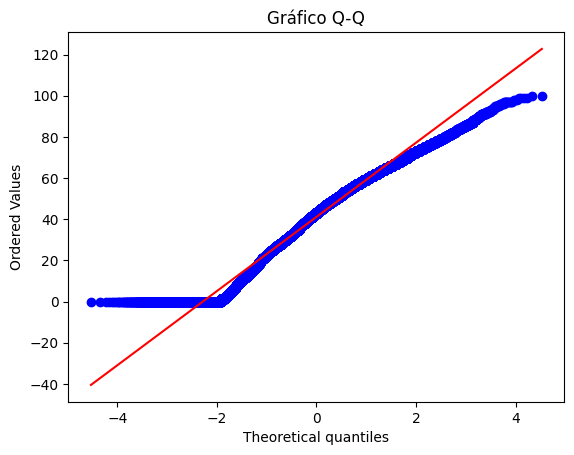

Shapiro-Wilk test: estadístico=0.9825190797274527, p-valor=2.7730210716711668e-83
Asimetría: -0.3363877054626326, Curtosis: -0.40153597697168353
La distribución es platicúrtica (colas ligeras y pico achatado).
La distribución tiene asimetría negativa (sesgo hacia la izquierda).


In [126]:

popularidad=df_features['popularity']
# Histograma
sns.histplot(popularidad.to_frame(), kde=True)
plt.title('Histograma con KDE')
plt.show()

# Gráfico Q-Q
stats.probplot(popularidad, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(popularidad)
print(f"Shapiro-Wilk test: estadístico={stat}, p-valor={p_value}")

# Asimetría y Curtosis
skewness = stats.skew(popularidad)
kurtosis = stats.kurtosis(popularidad)

print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

if kurtosis > 3:
    print("La distribución es leptocúrtica (colas pesadas y picos agudos).")
elif kurtosis < 3:
    print("La distribución es platicúrtica (colas ligeras y pico achatado).")
else:
    print("La distribución es mesocúrtica (similar a una distribución normal).")

if skewness > 0:
    print("La distribución tiene asimetría positiva (sesgo hacia la derecha).")
elif skewness < 0:
    print("La distribución tiene asimetría negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica.")

**-Shapiro-Wilk test**: La prueba indica con una evidencia estadística muy fuerte (p-valor extremadamente bajo) que los datos no siguen una distribución normal.   
**-Asimetría**: El valor negativo de la asimetría (-0.3364) sugiere que la distribución tiene una ligera asimetría negativa (cola izquierda más larga).   
**-Curtosis**: La curtosis negativa (-0.4015) indica que los datos tienen una distribución menos pronunciada (menos pico) y colas más ligeras que una distribución normal.

In [127]:
df_features.sort_values('popularity',ascending=False).head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,3.0
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,3.0
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.5
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.5
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.2


In [128]:
df_features.sort_values('popularity',ascending=False).tail(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
79,Movie,Jean Claude Corbel,Le Chat Botté 4,2qZswteMfdcc3FLjaYR38E,0,0.778,0.610,0.266,0.000,G,0.2690,-15.150,Major,0.9240,84.943,4/4,0.633,3.3
78,Movie,Jean Claude Corbel,Le voyage à Lilliput,2nM2RKLUqdVJYakMbaWBHC,0,0.715,0.569,0.345,0.000,C,0.1110,-12.506,Minor,0.4840,88.225,3/4,0.351,16.3
34,Movie,Chorus,Ambarsare Diyan Warhiyan,1Zj5XBiUaHTkkBJ2nET477,0,0.123,0.784,0.653,0.002,E,0.2220,-10.732,Minor,0.0584,94.011,4/4,0.968,3.9
33,Movie,Henri Salvador,La Samba De Là-Bas,1X8uhUgBKmotpvHrsS7fEe,0,0.942,0.883,0.418,0.000,A#,0.3620,-11.432,Major,0.2280,128.494,4/4,0.858,2.9
32,Movie,Henri Salvador,C Est Le Be Bop,1R8nFU8no9yINDiCzBcgB3,0,0.922,0.681,0.440,0.000,C,0.0397,-12.508,Minor,0.2220,84.173,4/4,0.747,2.2


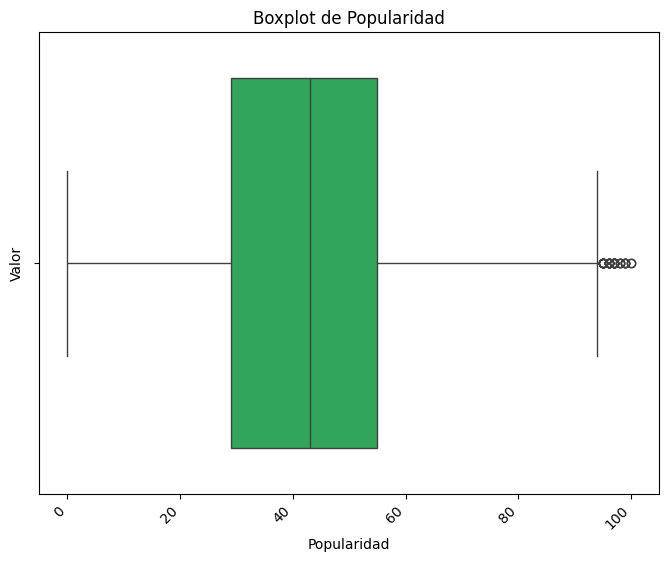

In [129]:
# Crear el gráfico de caja
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_features, x='popularity', ax=ax,color=verde)
# Agregar etiquetas al eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)
ax.set_xlabel('Popularidad')
ax.set_ylabel('Valor')

# Configurar el título
ax.set_title('Boxplot de Popularidad')
# Mostrar el gráfico
plt.show()

In [130]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_features['popularity'].quantile(0.25)
Q3 = df_features['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_features[(df_features['popularity'] < lower_limit) | (df_features['popularity'] > upper_limit)]

# Mostrar los outliers

print('Tenemos {} outliers'.format(outliers.shape[0])) 
outliers.sort_values(by='popularity',ascending=False).head(10)

Tenemos 38 outliers


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,3.0
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,3.0
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.5
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.2
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.5
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.2
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.2
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.2
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.2
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533,3.4


Observan algo sospechoso?

In [131]:
duplicados = df_features[df_features['track_id'].duplicated(keep=False)].sort_values(by='track_id')
duplicados

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
14492,Dance,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524,3.1
110840,Pop,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524,3.1
96926,Children’s Music,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.034900,0.564,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365,3.5
153533,Rock,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,58,0.034900,0.564,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365,3.5
65253,Folk,Alabama Shakes,Gemini,001ifh9Zkyc5DhK7AGQRtK,42,0.447000,0.411,0.422,0.121000,E,0.0742,-5.475,Minor,0.0459,147.465,1/4,0.346,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,Alternative,Bay Faction,Beach Book,7zy2ezQByCeFcaDtsxt77o,40,0.063200,0.537,0.474,0.002590,E,0.0917,-7.440,Minor,0.0500,147.310,4/4,0.474,3.2
97007,Children’s Music,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,54,0.000508,0.488,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376,3.3
4751,Alternative,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,50,0.000508,0.488,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376,3.3
142703,Indie,Moonstar88,Migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.217000,0.664,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221,4.5


Ya que no vamos a hacer profundizar el análisis por autores, vamos a dejar pasar esto pero lo tomaremos en cuenta cuando sea necesario

In [132]:
df_features.groupby(['track_name','track_id'],sort=True)['track_id'].count().sort_values(ascending=False)

track_name                                    track_id              
Too Deep                                      3uSSjnDMmoyERaAK9KvpJR    8
Hallucinations                                0UE0RhnRaEYsiYgXpyLoZc    8
Cherry-coloured Funk                          6sVQNUvcVFTXvlk3ec0ngd    8
With Me                                       6AIte2Iej1QKlaofpjCzW1    8
D'Evils                                       0wY9rA9fJkuESyYm9uzVK5    8
                                                                       ..
"Amapola"                                     4a5FBowqksD8z8JzUd5eLX    1
"Amor ti vieta"                               2AVAOQ0erm4edi9OTMgjsj    1
"Are You Running Away from Me?"               7AylLhx7Yquy8hX4FHuULb    1
"Assez! Assez...Noël! Jésus vient de naître"  5u7n8lNfIAUKNaQLVqq7oK    1
Tom Sprang                                    0Wcpd7Cm2XRYxJVRlnY7rP    1
Name: track_id, Length: 177029, dtype: int64

In [133]:
df_features[['track_name','track_id']].value_counts().head()

track_name            track_id              
Too Deep              3uSSjnDMmoyERaAK9KvpJR    8
Hallucinations        0UE0RhnRaEYsiYgXpyLoZc    8
Cherry-coloured Funk  6sVQNUvcVFTXvlk3ec0ngd    8
With Me               6AIte2Iej1QKlaofpjCzW1    8
D'Evils               0wY9rA9fJkuESyYm9uzVK5    8
Name: count, dtype: int64

In [134]:
df_features[df_features['track_name']=='Too Deep']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
4840,Alternative,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,57,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
13845,Dance,Kehlani,Too Deep,0aSW5EMeNnQSMJQ8QN3zIW,71,0.614,0.516,0.638,0.00000,G,0.099,-6.673,Minor,0.0796,180.216,3/4,0.642,2.8
53881,R&B,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
88940,Hip-Hop,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
96090,Indie,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
97202,Children’s Music,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
108795,Pop,Kehlani,Too Deep,0aSW5EMeNnQSMJQ8QN3zIW,71,0.614,0.516,0.638,0.00000,G,0.099,-6.673,Minor,0.0796,180.216,3/4,0.642,2.8
114368,Rap,Kehlani,Too Deep,0aSW5EMeNnQSMJQ8QN3zIW,71,0.614,0.516,0.638,0.00000,G,0.099,-6.673,Minor,0.0796,180.216,3/4,0.642,2.8
118085,Rap,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3
150783,Pop,dvsn,Too Deep,3uSSjnDMmoyERaAK9KvpJR,62,0.284,0.616,0.243,0.14900,A,0.264,-13.975,Major,0.1030,183.948,4/4,0.560,3.3


### 6.2.1 Los 10 géneros más frecuentes...

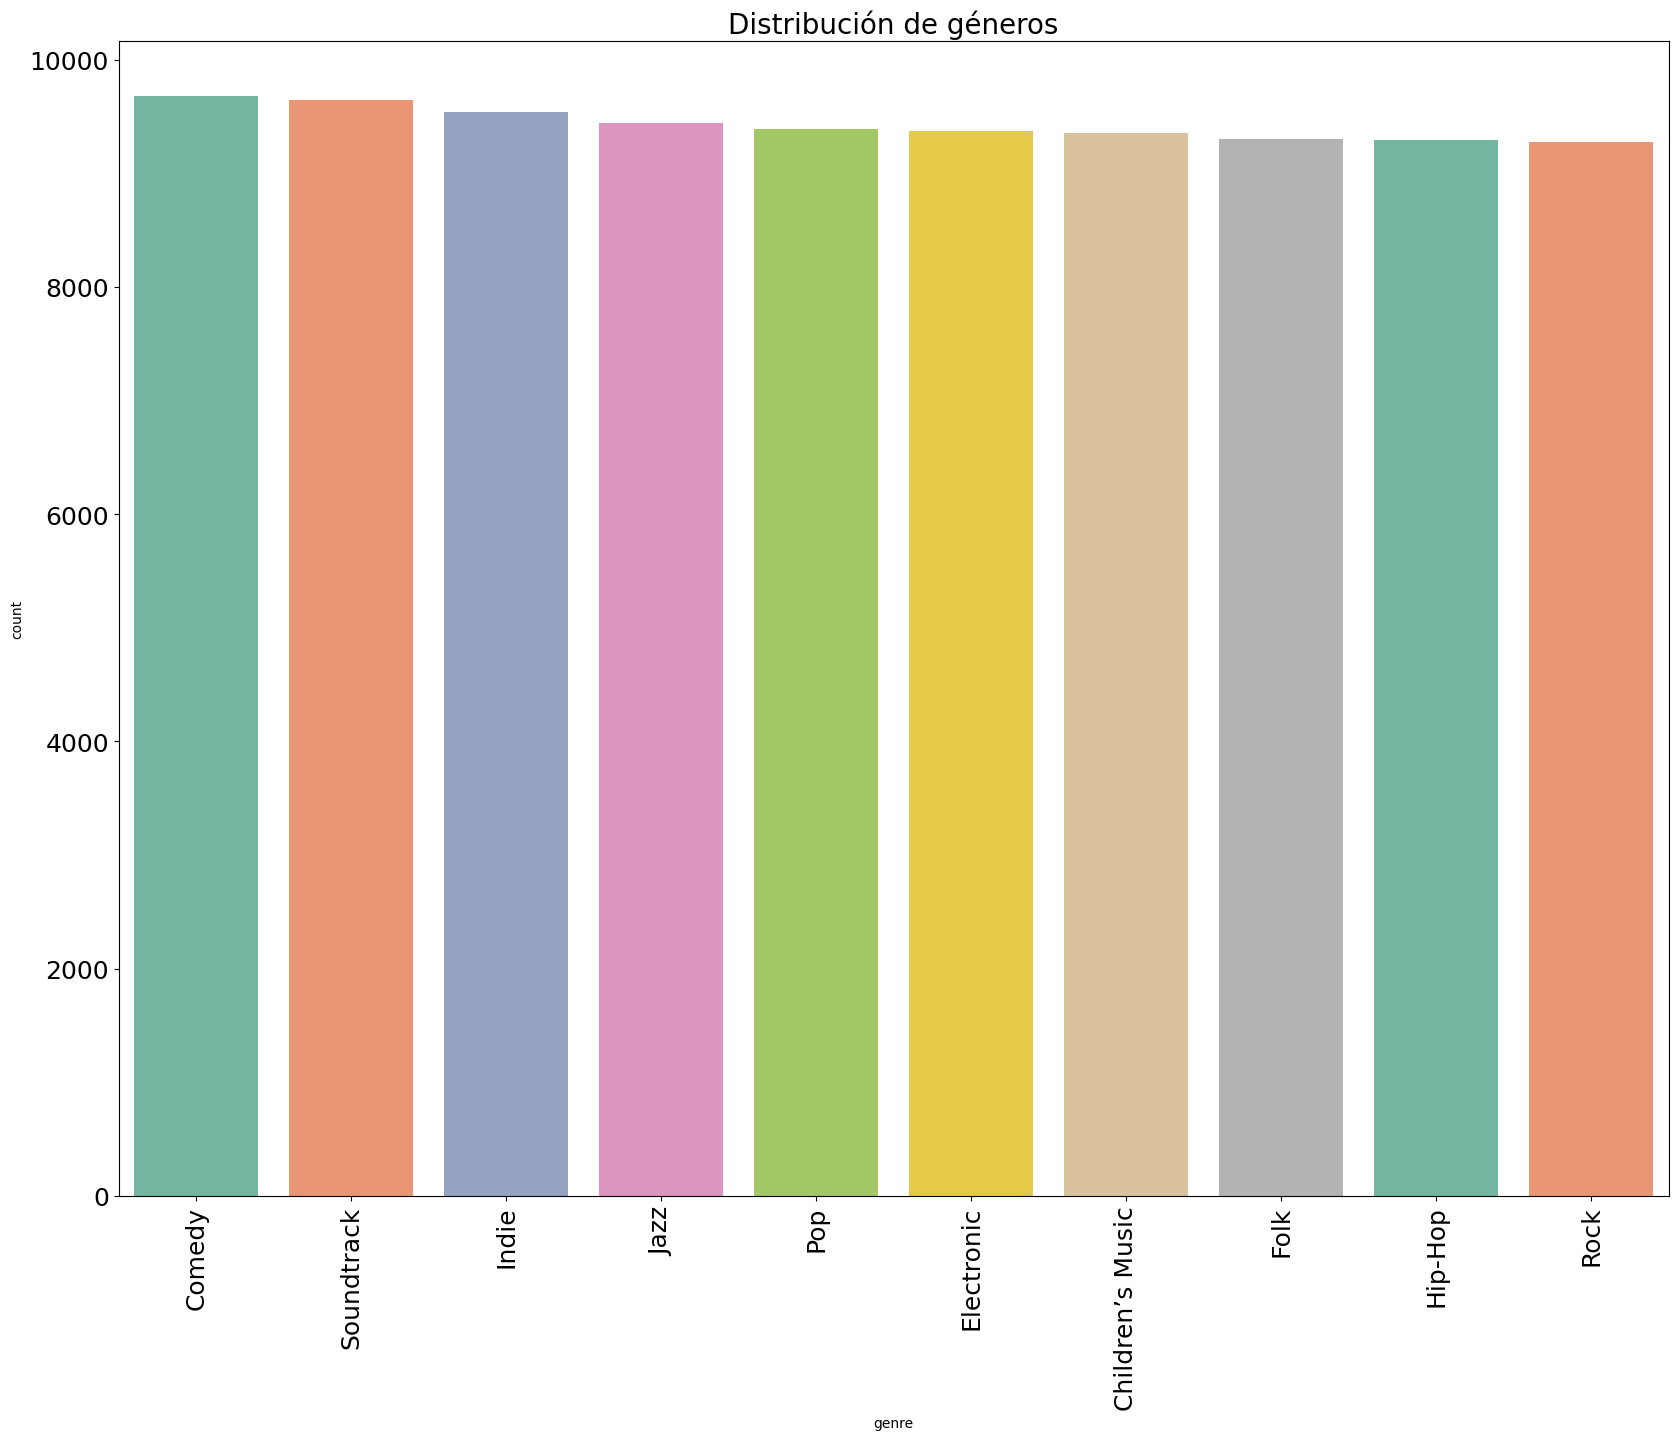

In [135]:
# Obtener los 10 géneros más frecuentes
generosfrecuentes10 = df_features['genre'].value_counts().head(10)
categorias = generosfrecuentes10.index.tolist()
colors = sns.color_palette('Set2', 10)

# Crear el gráfico de barras
ax = sns.countplot(x='genre', data=df_features, order=categorias, palette=colors)

# Configuración de las etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)
ax.set_title('Distribución de géneros', fontsize=20)
ax.tick_params(axis='both', labelsize=18)
ax.set_facecolor('white')

# Ajustar el tamaño del gráfico
plt.gcf().set_size_inches(20, 15)
plt.show()


### *Highlights sobre frecuencia de géneros:*

*El género que más se repite es **Comedy** seguido de **Sound track**, **Indie**, **Jazz**,**etc**.*

### 6.2.2 Los 10 artistas más frecuentes...

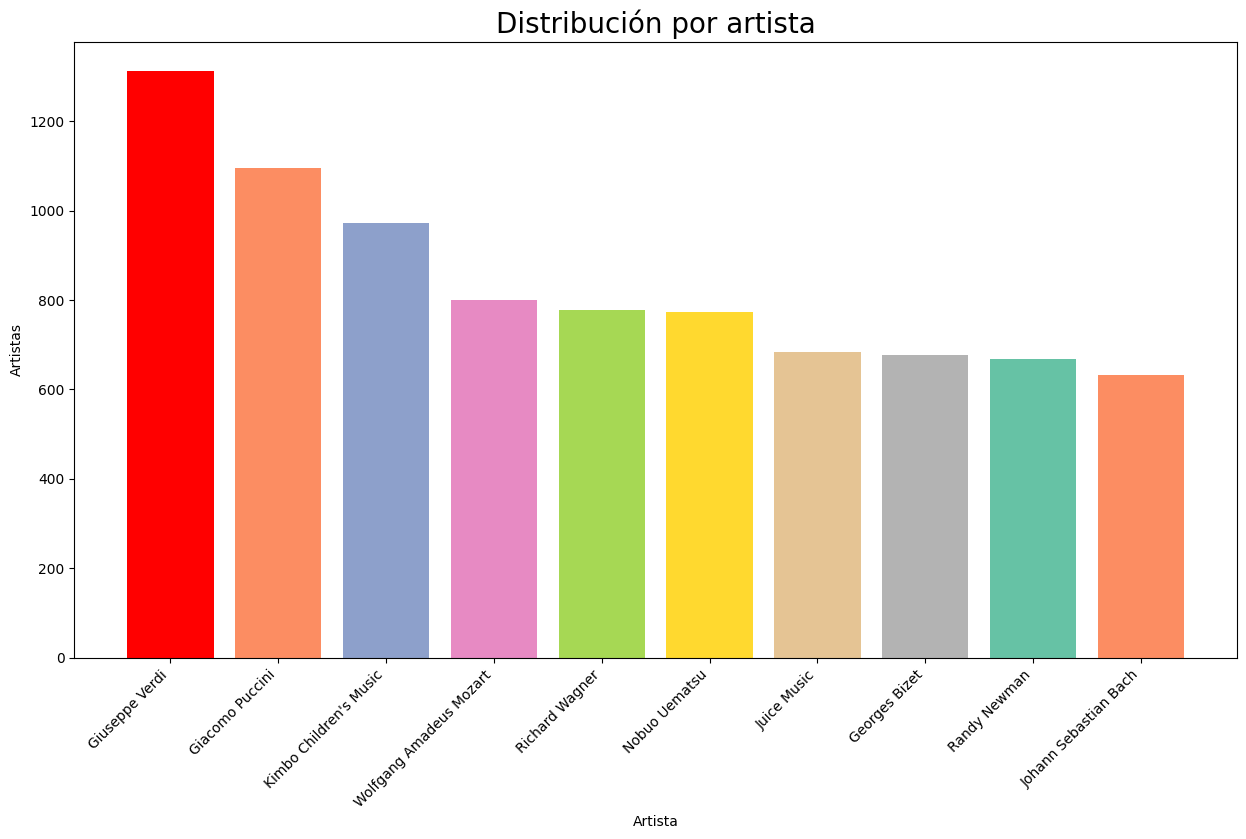

In [136]:
### ¿Cuál es el artista más frecuente?
df_sin_duplicados = df_features.drop_duplicates(subset='track_id')
ranking_artistas=df_sin_duplicados.groupby('artist_name',)['track_id'].count().sort_values(ascending = False).head(10)
colors = sns.color_palette('Set2', 10)
fig, ax =plt.subplots(figsize=(15, 8))
ax.bar(ranking_artistas.index, ranking_artistas,color=colors)
ax.set_title('Distribución por artista',fontsize=20)
ax.patches[0].set_facecolor('r')
ax.set_xlabel('Artista')
ax.set_ylabel('Artistas')
ax.set_facecolor('white')
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
df_features[df_features['artist_name'] == 'Giuseppe Verdi'][['track_name','genre']].sort_values(by='track_name').tail(10)

,track_name,genre
58744,"Verdi: Rigoletto, Act 1: ""Gualtier Maldé...Car...",Opera
82291,"Verdi: Rigoletto, Act 2 Scene 3: No. 9a, Scena...",Opera
79531,"Verdi: Rigoletto, Act 3 Scene 2: ""La donna è m...",Opera
79736,"Verdi: Rigoletto, Act 3: ""La donna è mobile"" (...",Opera
128411,"Verdi: Rigoletto, Act 3: ""La donna è mobile"" (...",Classical
57864,"Verdi: Rigoletto, Act 3: ""La donna è mobile"" (...",Opera
79666,"Verdi: Rigoletto, Act 3: ""La donna è mobile"" (...",Opera
82488,"Verdi: Un ballo in maschera, Act 1 Tableau 1: ...",Opera
81220,"Verdi: Un ballo in maschera, Act 3 Tableau 3: ...",Opera
82062,レクイエム 3. Offertorio (All-4),Opera


Mucho trabajo para applicarle REGEX

In [138]:
df_features[df_features['artist_name'] == 'Giuseppe Verdi']['genre'].unique()

array(['Opera', 'Classical'], dtype=object)

Como verán estandarizar los títulos de las canciones puede ser muy complejo. Es una oportunidad de mejora pero evitaremos entrar en esa controversia

### *Highlights sobre frecuencia de géneros:*

*El artista que más aparece es **Giuseppe Verdi** seguido de **Giacomo Puccini**, **Kimbo Children Music**, **Nobuo Uematsu**, **Richard Wagner**,**etc**.*

### 6.3 Análisis bivariante ###

### 6.3.1 Análisis de correlación ###

In [139]:
#Análisis de correlación de variables
correlacion_global=df_features.corr(numeric_only=True)
correlacion_global

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min
popularity,1.000000,-0.381295,0.256564,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,0.002397
acousticness,-0.381295,1.000000,-0.364546,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011147
danceability,0.256564,-0.364546,1.000000,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125711
energy,0.248922,-0.725576,0.325807,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030497
instrumentalness,-0.210983,0.316154,-0.364941,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076007
liveness,-0.167995,0.069004,-0.041684,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023738
loudness,0.363011,-0.690202,0.438668,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047570
speechiness,-0.151076,0.150935,0.134560,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016219
tempo,0.081039,-0.238247,0.021939,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028460
valence,0.060076,-0.325798,0.547154,0.436771,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000,-0.141759


<Axes: >

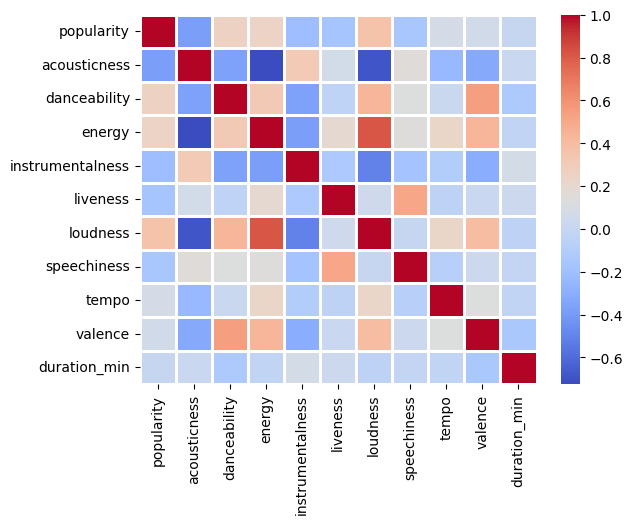

In [140]:
sns.heatmap(data=correlacion_global, cmap='coolwarm', linewidths=1, annot=False,)

¿Existe alguna relación entre la popularidad y el resto de variables?

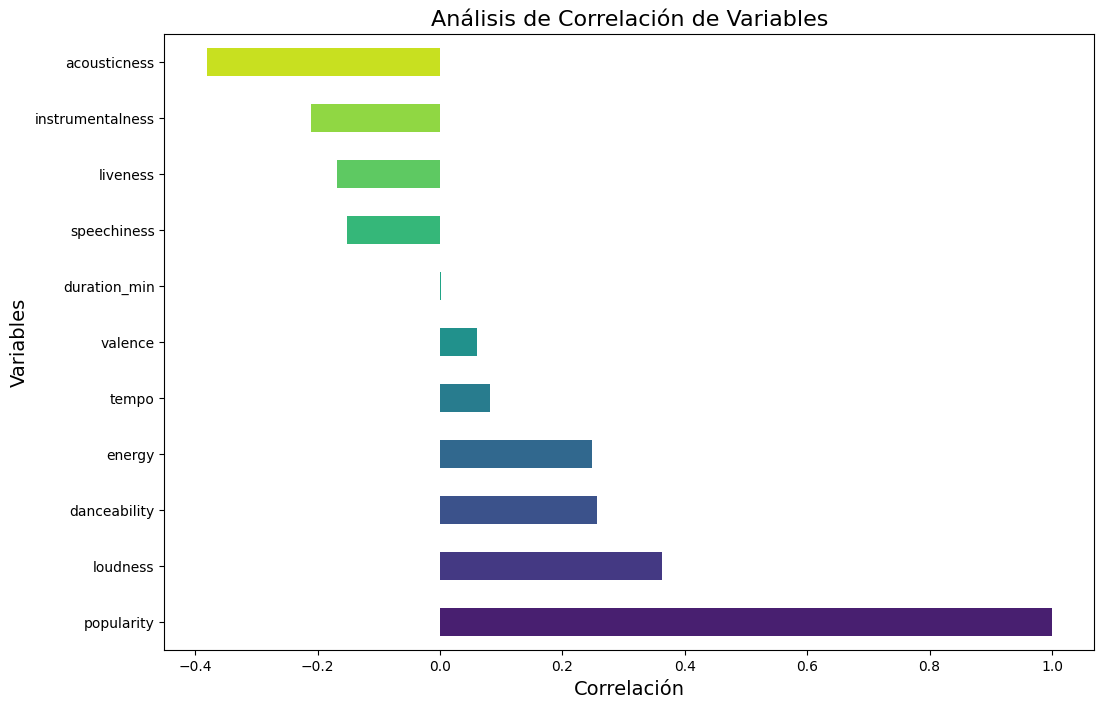

In [141]:

# Copia del dataframe de correlación (simulado para este ejemplo)
correlacion_copia = correlacion_global.copy()

# Extraer y ordenar la variable de interés
correlation_values = correlacion_copia['popularity'].sort_values(ascending=False)

# Generar una lista de colores (puedes usar 'sns.color_palette' o definir tus propios colores)
colors = sns.color_palette("viridis", len(correlation_values))  # Paleta de colores diversa

# Crear el gráfico de barras horizontal con colores personalizados
correlation_values.plot(
    kind='barh',
    figsize=(12, 8),
    color=colors  # Aplicar los colores
)

# Agregar etiquetas y título al gráfico
plt.title('Análisis de Correlación de Variables', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Mostrar el gráfico
plt.show()


### *Highlights sobre correlación de variables:*

*-Las variables se tienen mayor correlación con la popularidad son:*

    1. Acousticness -----> (-)38%
    2. Loudness ---------> (+)36%
    3. Danceability -----> (+)26%
    4. Energy -----------> (+)25%
    5. Liveness ---------> (-)21%


In [142]:
correlaciones_relevantes=abs(correlation_values).sort_values(ascending=False)[:5].index   
correlaciones_relevantes

Index(['popularity', 'acousticness', 'loudness', 'danceability', 'energy'], dtype='object')

Ya que una de nuestras variables relevantes en el EDA es la popularidad, podemos identificar que acousticness, energy, danceability y loudness son las variable que muestran mayor correlación. En adelante centraremos el análisis sobre estas variables y sus relación con la popularidad

### 6.3.2 Los 10 artistas más populares(en promedio)...

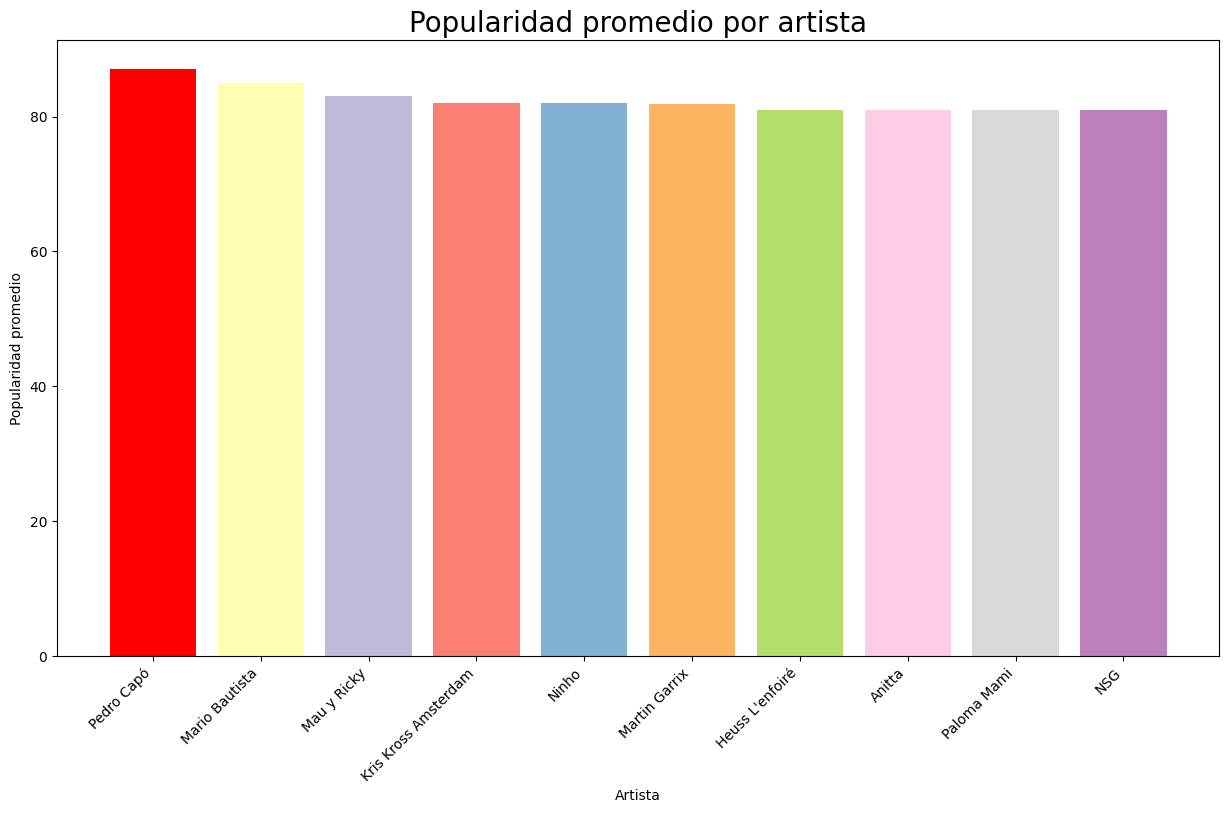

In [143]:
# Agrupación y cálculo de estadísticas
ranking_artistas = df_sin_duplicados.groupby('artist_name', as_index=False).aggregate({
    'popularity': 'mean',
    'track_id': 'count',
    'duration_min': 'mean'
})

# Ordenar por popularidad promedio y seleccionar los 10 artistas más populares
popularidad_artistas = ranking_artistas.sort_values(by='popularity', ascending=False).head(10)
# Gráfico de barras
colors = sns.color_palette('Set3', 10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(popularidad_artistas['artist_name'], popularidad_artistas['popularity'], color=colors)
ax.patches[0].set_facecolor('r')  # Cambiar el color de la primera barra
ax.set_title('Popularidad promedio por artista', fontsize=20)
ax.set_xlabel('Artista')
ax.set_ylabel('Popularidad promedio')
ax.set_facecolor('white')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.show()


In [144]:
# Agrupar por artista y contar el número de canciones
tabla_canciones = ranking_artistas.loc[popularidad_artistas.index, ['artist_name', 'track_id']]
tabla_canciones.rename(columns={'artist_name': 'Artista', 'track_id': 'Número de canciones'}, inplace=True)
tabla_canciones

,Artista,Número de canciones
9840,Pedro Capó,2
8203,Mario Bautista,1
8370,Mau y Ricky,2
7091,Kris Kross Amsterdam,1
9285,Ninho,1
8255,Martin Garrix,7
5216,Heuss L'enfoiré,1
712,Anitta,3
9661,Paloma Mami,2
9017,NSG,1


*Highlights sobre popularidad de artistas:*

*El artista más popular es  **Pedro Capó** seguido de **Mario Bautista**, **Mau y Ricky**, **Kris Kross Amsterdam**, **Ninho**,**etc**.*

### 6.3.3 Las 10 canciones más populares(promedio)... 

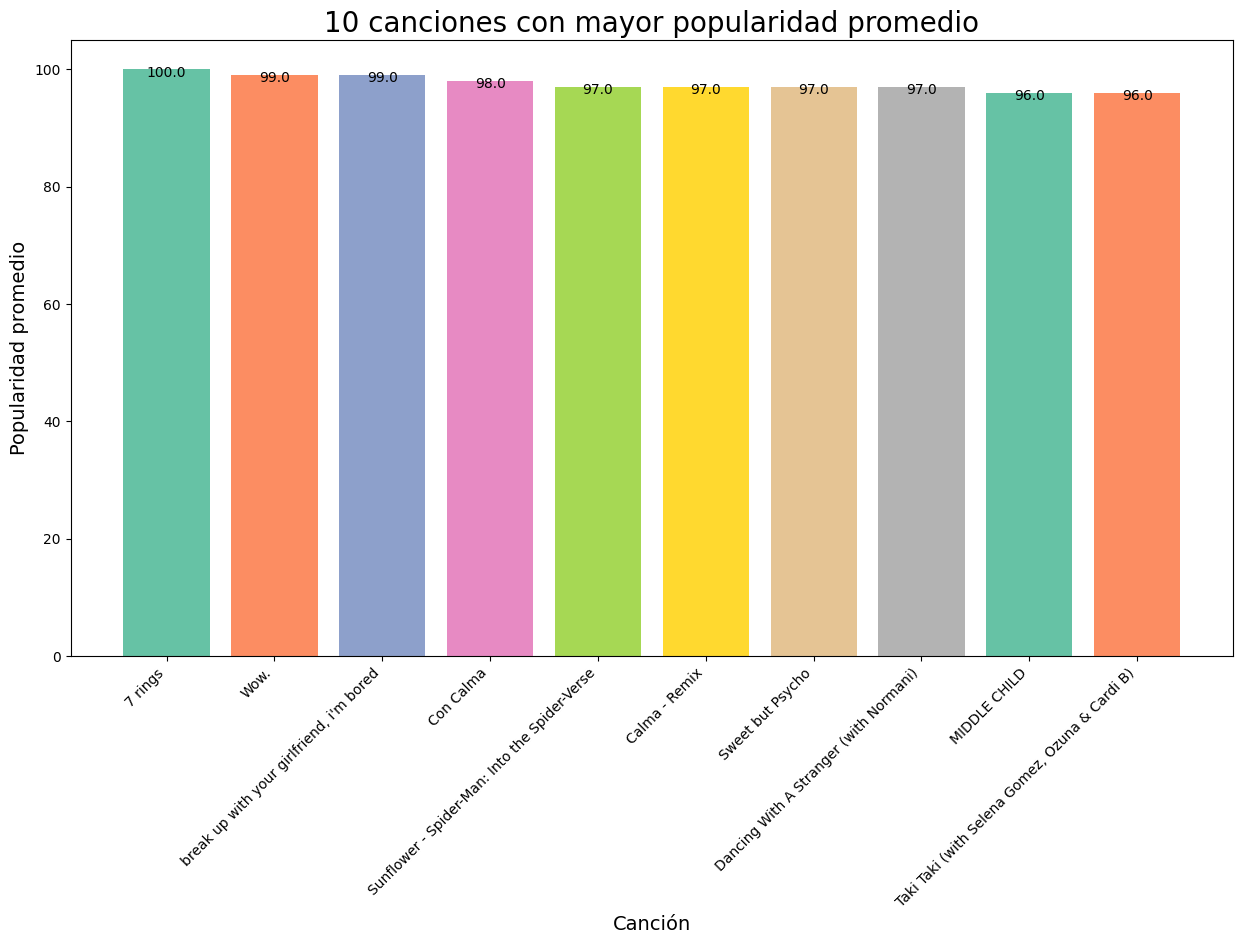

In [145]:
# Ya que vamos tenemos que analizar cancioens es posible que hayan canciones de nombres similares. Por eso, lo hacemos por track_id
ranking_canciones = (
    df_sin_duplicados.groupby('track_name', as_index=False)
    .aggregate({'popularity': 'mean'})
    .rename(columns={'popularity': 'popularidad_promedio'})
)
# Ordenar por popularidad promedio descendente y seleccionar las 10 canciones más populares
top_canciones = ranking_canciones.sort_values(by='popularidad_promedio', ascending=False).head(10)

# Graficar
colors = sns.color_palette('Set2', 10)
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(top_canciones['track_name'], top_canciones['popularidad_promedio'], color=colors)

# Añadir los valores dentro de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada x
        height - 0.5,  # Coordenada y (ligeramente dentro de la barra)
        f'{height:.1f}',  # Texto con un decimal
        ha='center',  # Centrar el texto horizontalmente
        va='center',  # Centrar el texto verticalmente
        color='black',  # Color del texto
        fontsize=10
    )

# Configuración del gráfico
ax.set_title('10 canciones con mayor popularidad promedio', fontsize=20)
ax.set_xlabel('Canción', fontsize=14)
ax.set_ylabel('Popularidad promedio', fontsize=14)
ax.set_facecolor('white')
plt.xticks(rotation=45, ha='right')
plt.show()


In [146]:
top_canciones['track_name'][:2]

2187      7 rings
142020       Wow.
Name: track_name, dtype: object

In [147]:
df_sin_duplicados[df_sin_duplicados['track_name']=='Wow.']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.163,0.833,0.539,0.000002,B,0.101,-7.399,Minor,0.178,99.947,4/4,0.385,2.5


### *Highlights sobre popularidad de canciones:*

*La canción más popular es  **7 rings** seguido de **Wow**, **Break up with your girlfiend, i'm bored**, **Con calma**, **Sunflower**,**etc**.*

### 6.3.4 Los 10 géneros más populares(en promedio)...

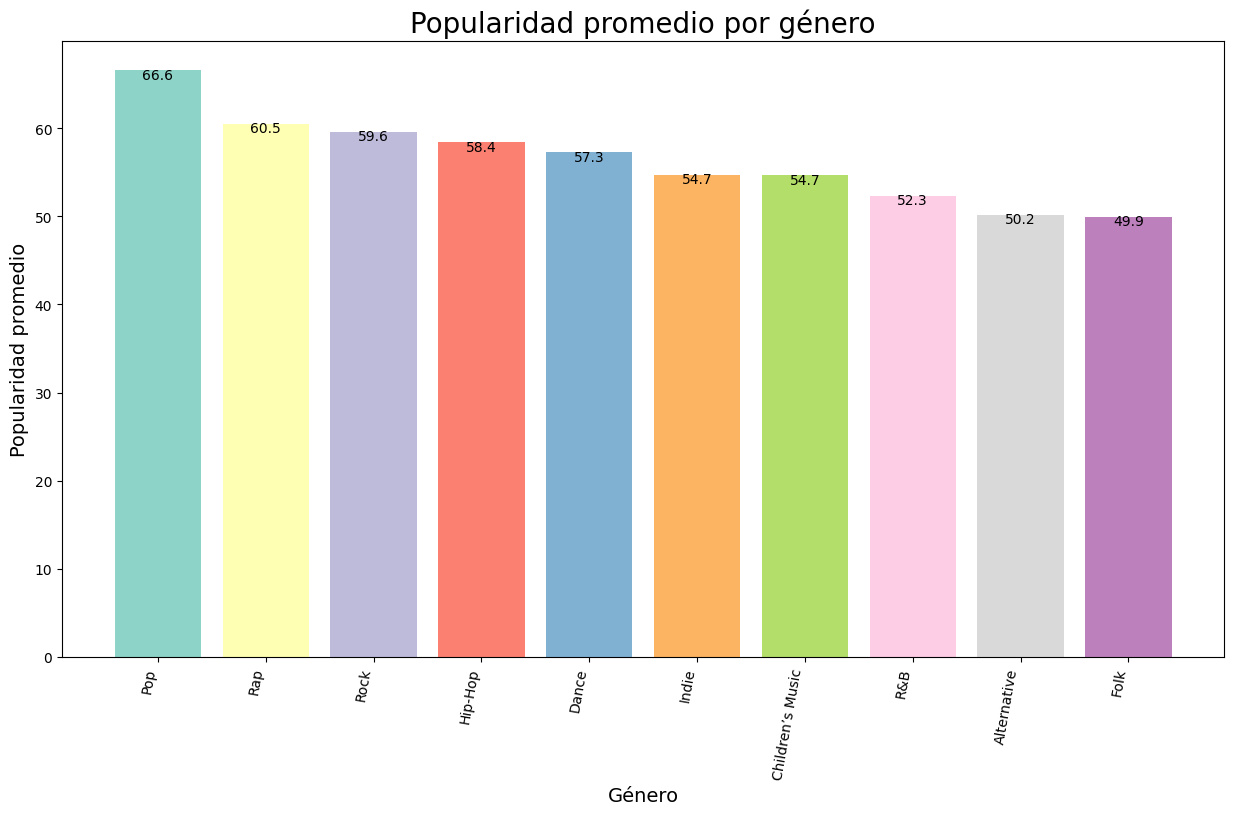

In [148]:
# Usamos la bbd original porque pueden haber varios géneros para una canción lo cual representas 1 o más filas
ranking_generos = (
    df_features.groupby('genre', as_index=False)
    .aggregate({'popularity': 'mean'})
    .rename(columns={'popularity': 'popularidad_promedio'})
)

# Ordenar por popularidad promedio descendente y seleccionar los 10 géneros más populares
top_generos = ranking_generos.sort_values(by='popularidad_promedio', ascending=False).head(10)

# Graficar
colors = sns.color_palette('Set3', 10)
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(top_generos['genre'], top_generos['popularidad_promedio'], color=colors)

# Añadir los valores dentro de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada x
        height - 0.5,  # Coordenada y (ligeramente dentro de la barra)
        f'{height:.1f}',  # Texto con un decimal
        ha='center',  # Centrar el texto horizontalmente
        va='center',  # Centrar el texto verticalmente
        color='black',  # Color del texto
        fontsize=10
    )

# Configuración del gráfico
ax.set_title('Popularidad promedio por género', fontsize=20)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Popularidad promedio', fontsize=14)
ax.set_ylim()  # Limitar el eje Y para una mejor visualización
ax.set_facecolor('white')
plt.xticks(rotation=80, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.show()


### *Highlights sobre popularidaad de géneros:*

*El género más popular es el **Pop** seguido del **Rap**, **Rock**, **Hip-Hop**, **Dance**,**etc**.*

Creando un dataframe de los 5 géneros más populares para identificar patrones o comportamientos que nos permitan establecer una relación con la popularidad de sus canciones.

***6.3.5 Analizando cómo se comportan los 5 géneros elegidas***

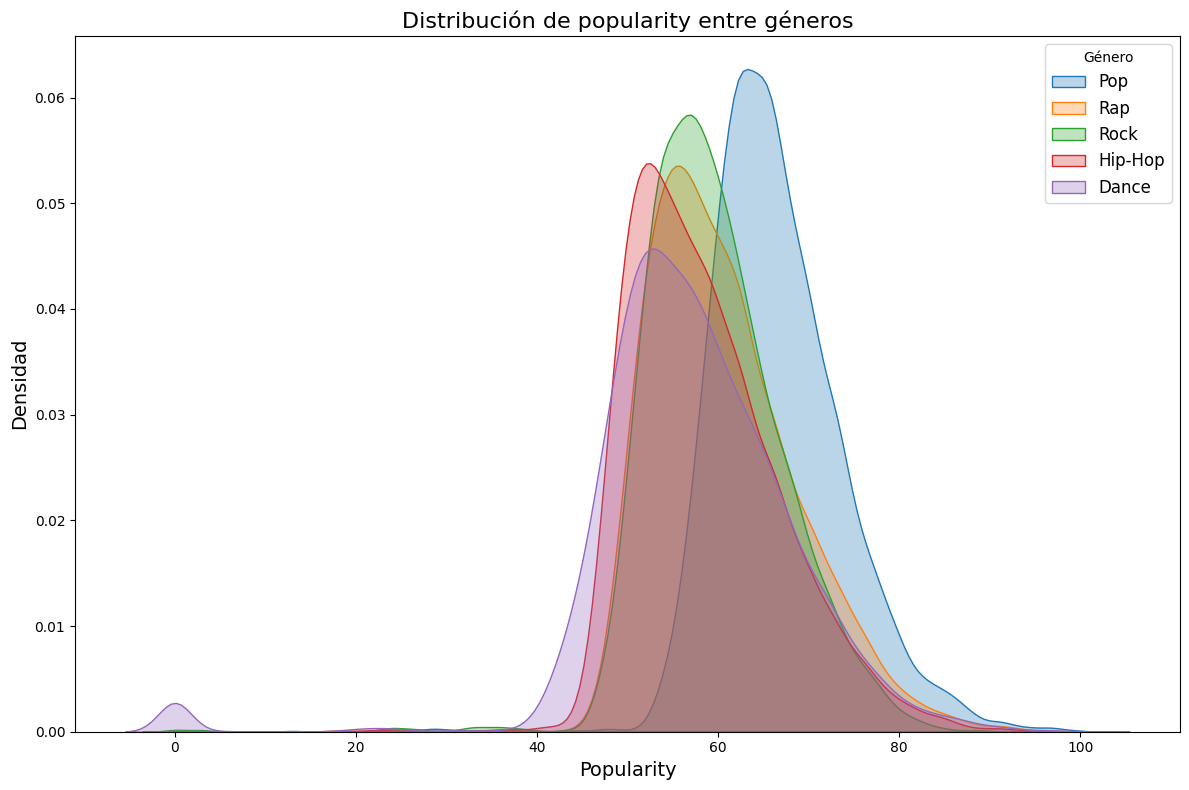

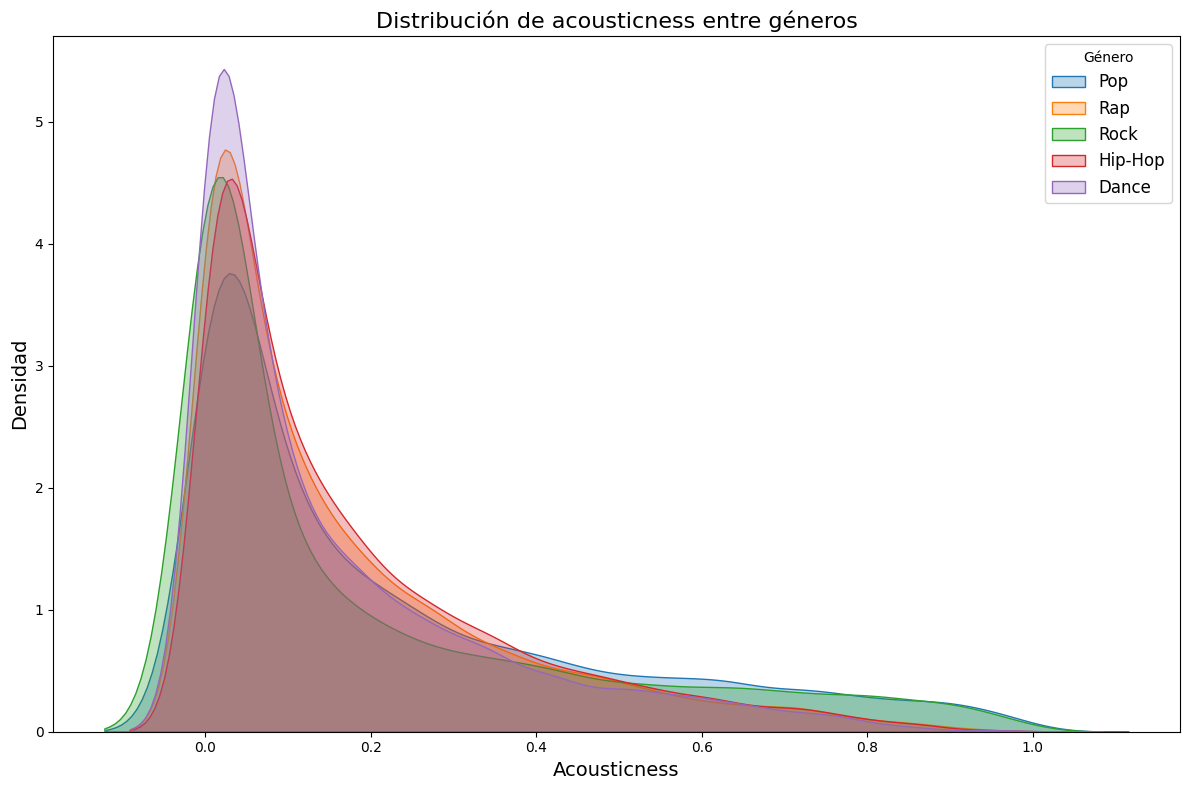

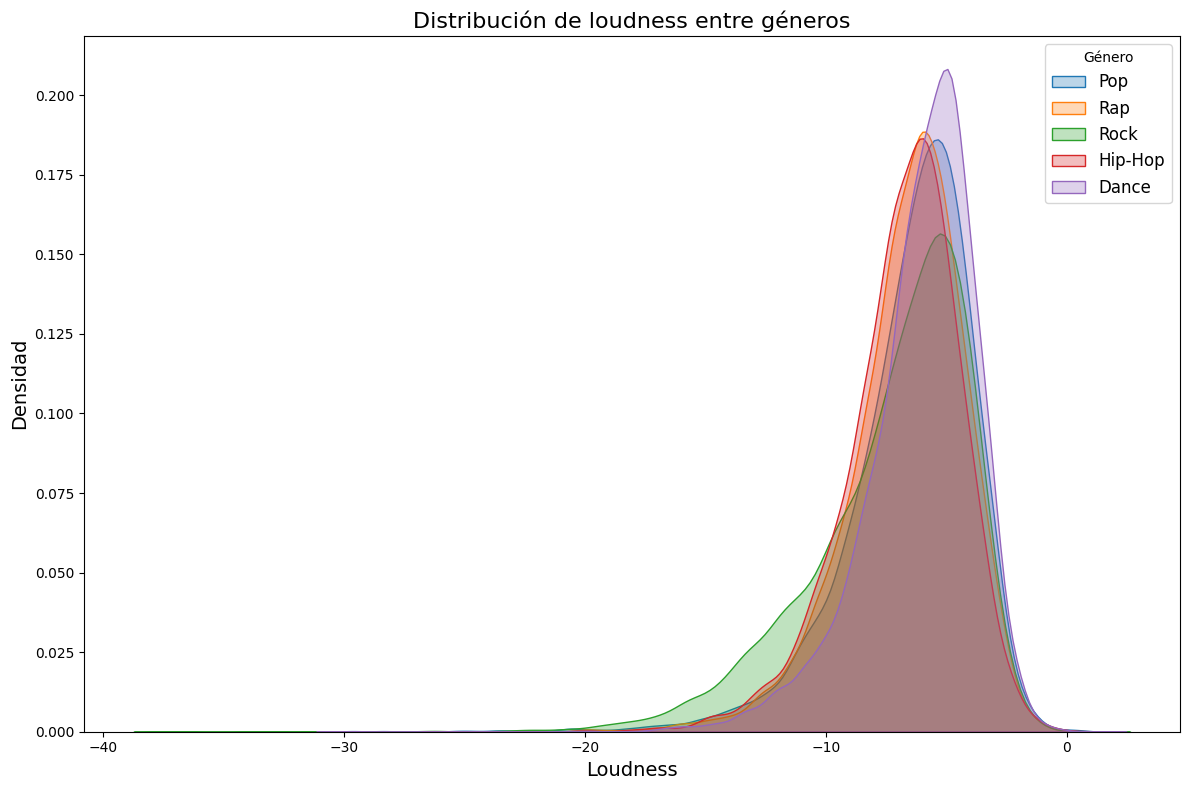

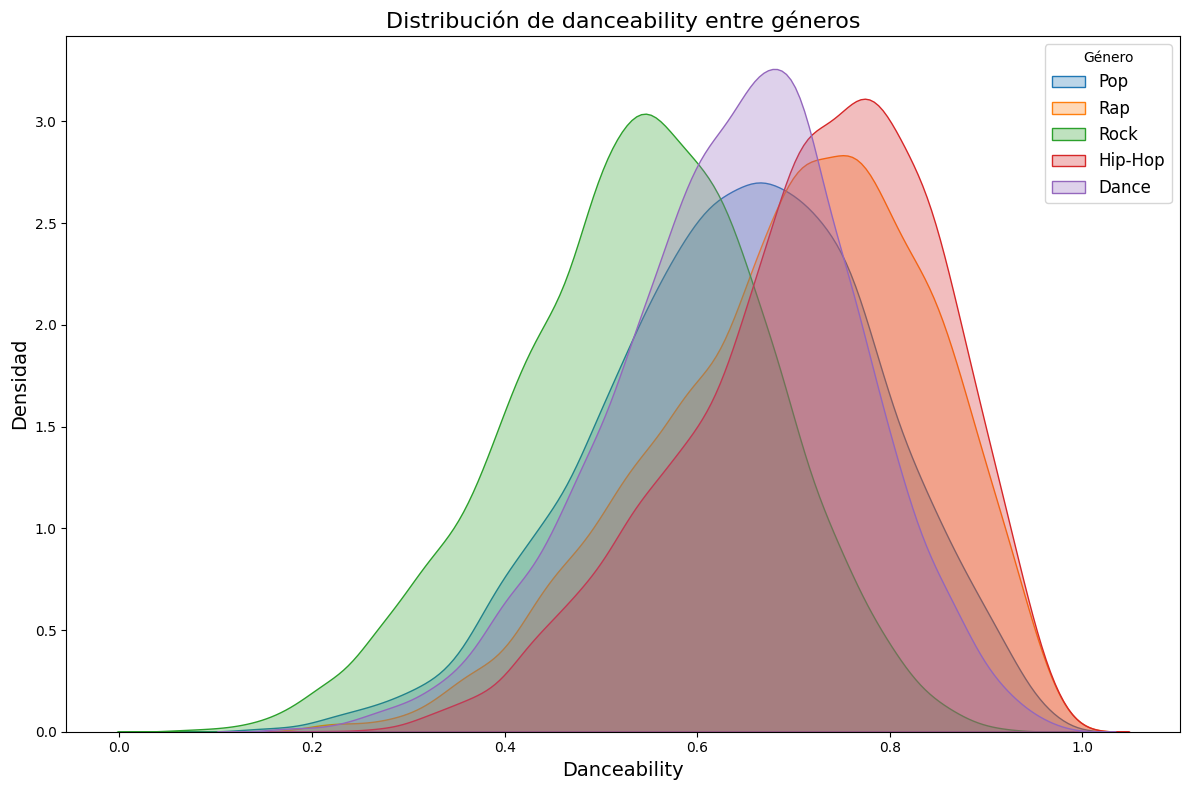

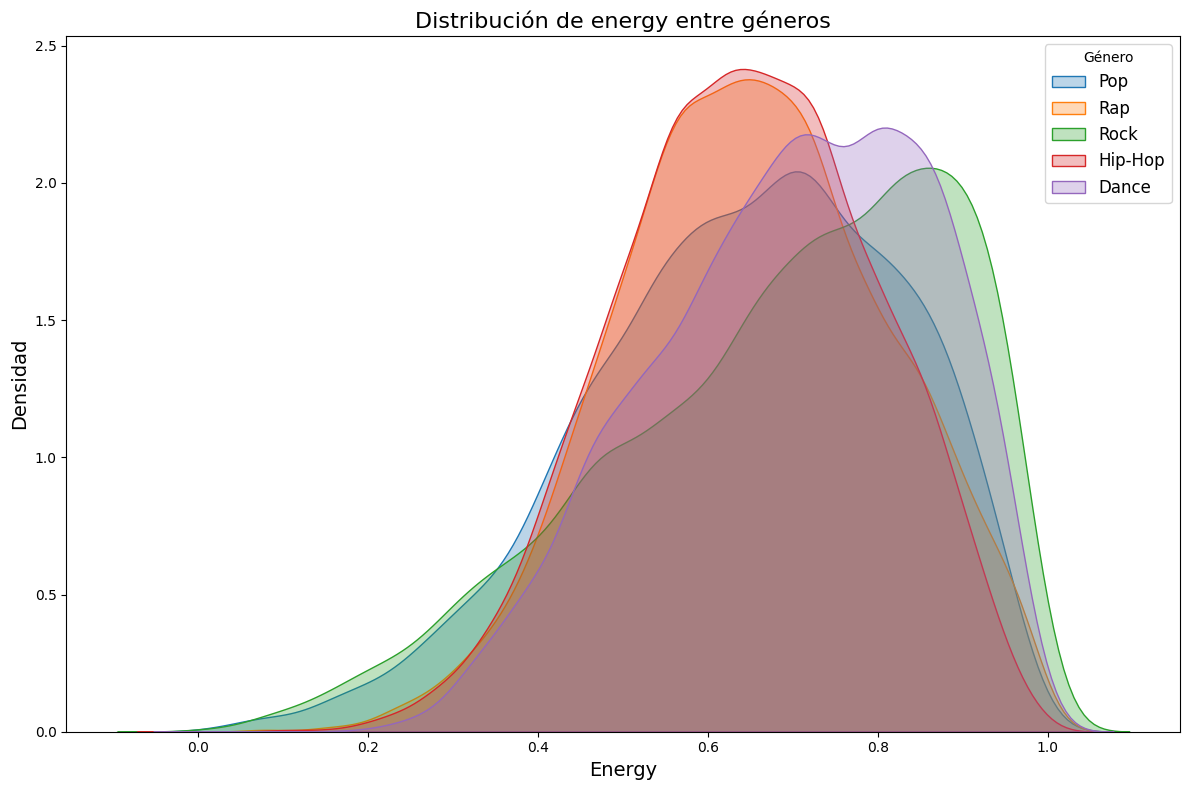

In [149]:
# Variables iniciales
top5genres = ['Pop', 'Rap', 'Rock', 'Hip-Hop', 'Dance']
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]

# Iterar por cada correlación relevante
for feature in correlaciones_relevantes:
    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Graficar los datos para cada género
    for genre in top5genres:
        genre_data = df_features_top5genres[df_features_top5genres['genre'] == genre]
        sns.kdeplot(data=genre_data, x=feature, label=genre, fill=True, alpha=0.3)
    
    # Personalizar el gráfico
    plt.title(f'Distribución de {feature} entre géneros', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel('Densidad', fontsize=14)
    plt.legend(title='Género', fontsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


En base a los highlighs, podemos focalizar el análisis en los géneros que mayor impacto tienen en la popularidad de las canciones. 

Creando un dataframe de los 5 géneros más populares para identificar patrones o comportamientos que nos permitan establecer una relación con la popularidad de sus canciones.

### 6.3.7 Análisis de la duración vs género

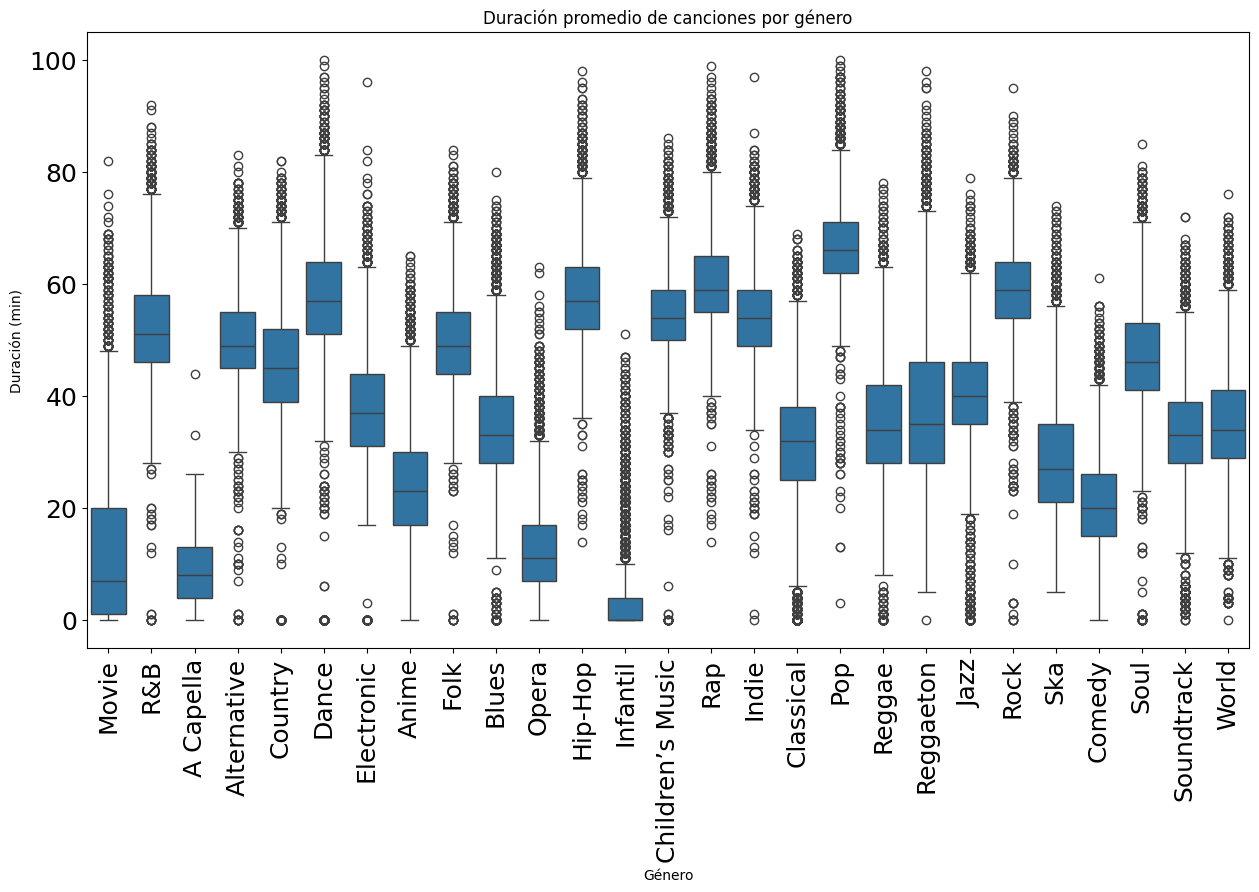

In [150]:
fig, ax = plt.subplots(figsize=(15, 8))

ax=sns.boxplot( x = df_features['genre'], y = df_features["popularity"])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='both', labelsize=18)

plt.xlabel('Género')
plt.ylabel('Duración (min)')
plt.title('Duración promedio de canciones por género')

plt.show()

### 6.3.8 Aplicando análisis inferencial ###

In [151]:
df_features_numericas = df_features.select_dtypes(include=['float', 'int'])

results = []

for col in df_features_numericas:
    stat, p = shapiro(df_features_numericas[col])
    normal_distribution = p > 0.05

    result = {
        'Feature': col,
        'Estadístico de Prueba': stat,
        'Valor p': p,
        'Distribución Normal': normal_distribution

    }
    results.append(result)

df_results = pd.DataFrame(results,)

df_results

,Feature,Estadístico de Prueba,Valor p,Distribución Normal
0,popularity,0.982519,2.773021e-83,False
1,acousticness,0.847939,8.887104e-143,False
2,danceability,0.984017,3.606744e-81,False
3,energy,0.958758,5.965193e-105,False
4,instrumentalness,0.533773,5.763069e-180,False
5,liveness,0.718635,1.153465e-162,False
6,loudness,0.851419,4.693539e-142,False
7,speechiness,0.509486,9.377421e-182,False
8,tempo,0.978391,2.130002e-88,False
9,valence,0.966491,1.781609e-99,False


In [152]:
loudness_by_genre = [df_features[df_features['genre'] == genre]['popularity'] for genre in top5genres]
stat, p_value = f_oneway(*loudness_by_genre)
print("ANOVA de una vía para 'loudness':")
print(f"Estadístico F: {stat:.4f}, p-valor: {p_value:.4e}")
if p_value < 0.05:
    print("Rechazamos H0: Hay diferencias significativas en la intensidad promedio entre géneros.")
else:
    print("No rechazamos H0: No hay diferencias significativas en la intensidad promedio entre géneros.")

ANOVA de una vía para 'loudness':
Estadístico F: 1660.2288, p-valor: 0.0000e+00
Rechazamos H0: Hay diferencias significativas en la intensidad promedio entre géneros.


In [153]:
# Cálculo de las correlaciones
pearson_corr, pearson_p = pearsonr(df_features['danceability'], df_features['popularity'])
spearman_corr, spearman_p = spearmanr(df_features['danceability'], df_features['popularity'])

# Mostrar los resultados
print("Correlación entre 'danceability' y 'popularity':")
print(f"Pearson: coef = {pearson_corr:.4f}, p-valor = {pearson_p:.4e}")
print(f"Spearman: coef = {spearman_corr:.4f}, p-valor = {spearman_p:.4e}")
# Comprobación del p-valor para la hipótesis nula
if pearson_p < 0.05:
    print("Rechazamos H0: Existe una correlación significativa entre bailabilidad y popularidad.")
else:
    print("No rechazamos H0: No hay una correlación significativa entre bailabilidad y popularidad.")


Correlación entre 'danceability' y 'popularity':
Pearson: coef = 0.2566, p-valor = 0.0000e+00
Spearman: coef = 0.2571, p-valor = 0.0000e+00
Rechazamos H0: Existe una correlación significativa entre bailabilidad y popularidad.


In [154]:

rap_energy = df_features[df_features['genre'] == 'Rap']['energy']
hiphop_energy = df_features[df_features['genre'] == 'Hip-Hop']['energy']

# Prueba t para muestras independientes
stat, p_value = ttest_ind(rap_energy, hiphop_energy)

print("Prueba t para 'energy' entre Rap y Hip-Hop:")
print(f"Estadístico t: {stat:.4f}, p-valor: {p_value:.4e}")

if p_value < 0.05:
    print("Rechazamos H0: La energía promedio de Rap y Hip-Hop es significativamente diferente.")
else:
    print("No rechazamos H0: No hay diferencias significativas en la energía promedio entre Rap y Hip-Hop.")


Prueba t para 'energy' entre Rap y Hip-Hop:
Estadístico t: 3.2144, p-valor: 1.3095e-03
Rechazamos H0: La energía promedio de Rap y Hip-Hop es significativamente diferente.


In [ ]:
instrumentalness_by_genre = [df_features[df_features['genre'] == genre]['instrumentalness'] for genre in top5genres]

# ANOVA de una vía
stat, p_value = f_oneway(*instrumentalness_by_genre)

print("ANOVA de una vía para 'instrumentalness':")
print(f"Estadístico F: {stat:.4f}, p-valor: {p_value:.4e}")

if p_value < 0.05:
    print("Rechazamos H0: Hay diferencias significativas en la instrumentalidad promedio entre géneros.")
else:
    print("No rechazamos H0: No hay diferencias significativas en la instrumentalidad promedio entre géneros.")


ANOVA de una vía para 'instrumentalness':
Estadístico F: 246.7352, p-valor: 4.4252e-210
Rechazamos H0: Hay diferencias significativas en la instrumentalidad promedio entre géneros.


In [156]:

x = df_features['danceability']
y = df_features['popularity']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Regresión lineal entre 'danceability' y 'popularity':")
print(f"Inclinación (slope): {slope:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"Coeficiente de correlación (R): {r_value:.4f}")
print(f"p-valor: {p_value:.4e}")
print(f"Error estándar: {std_err:.4f}")

if p_value < 0.05:
    print("Rechazamos H0: La bailabilidad tiene un efecto significativo sobre la popularidad.")
    print(f"La relación es positiva{' ' if slope > 0 else ' negativa'}: a mayor bailabilidad, mayor popularidad.")
else:
    print("No rechazamos H0: No se encontró un efecto significativo de la bailabilidad sobre la popularidad.")


Regresión lineal entre 'danceability' y 'popularity':
Inclinación (slope): 25.1438
Intercepto: 27.1887
Coeficiente de correlación (R): 0.2566
p-valor: 0.0000e+00
Error estándar: 0.1963
Rechazamos H0: La bailabilidad tiene un efecto significativo sobre la popularidad.
La relación es positiva : a mayor bailabilidad, mayor popularidad.


In [157]:

acousticness_by_genre = [df_features[df_features['genre'] == genre]['acousticness'] for genre in top5genres]
stat, p_value = kruskal(*acousticness_by_genre)

# Resultados
print("Kruskal-Wallis para 'acousticness':")
print(f"Estadístico H: {stat:.4f}, p-valor: {p_value:.4e}")

if p_value < 0.05:
    print("Rechazamos H0: Las distribuciones de 'acousticness' difieren significativamente entre géneros.")
else:
    print("No rechazamos H0: Las distribuciones de 'acousticness' no difieren significativamente entre géneros.")


Kruskal-Wallis para 'acousticness':
Estadístico H: 474.0293, p-valor: 2.7698e-101
Rechazamos H0: Las distribuciones de 'acousticness' difieren significativamente entre géneros.


In [158]:
# Comparar varianzas para danceability entre géneros
danceability_by_genre = [df_features[df_features['genre'] == genre]['danceability'] for genre in top5genres]
stat, p_value = levene(*danceability_by_genre)

# Resultados
print("Prueba de Levene para 'danceability':")
print(f"Estadístico W: {stat:.4f}, p-valor: {p_value:.4e}")

# Análisis
if p_value < 0.05:
    print("Rechazamos H0: Las varianzas de 'danceability' son significativamente diferentes entre géneros.")
else:
    print("No rechazamos H0: Las varianzas de 'danceability' no son significativamente diferentes entre géneros.")


Prueba de Levene para 'danceability':
Estadístico W: 45.2724, p-valor: 5.1784e-38
Rechazamos H0: Las varianzas de 'danceability' son significativamente diferentes entre géneros.
